In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from datetime import date
import datetime as dt
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.pyplot import title, ylabel
import seaborn as sns
from seaborn import load_dataset, histplot

df_bigmac = pd.read_csv('bigmac.csv')

#New dataframe to sort by region
df_region = pd.read_csv('continents2.csv')

In [2]:
#Drop any unnecessary columns
df_bigmac = df_bigmac.drop(['iso_a3','currency_code'], axis = 1)

df_bigmac = df_bigmac.fillna(0)

# Drop all rows with Euro Area as it is not a country
df_bigmac = df_bigmac[df_bigmac['name'] != 'Euro area']

# Convert to datetime if necessary
df_bigmac['date'] = pd.to_datetime(df_bigmac['date'])
# Extract the year and create a new 'Year' column
df_bigmac['Year'] = df_bigmac['date'].dt.year  

# Create a pivot table to get the local price for each name and year
pivot_table = df_bigmac.pivot_table(index='name', columns='Year', values='local_price', fill_value=0)
# Calculate PPP for each name and year
df_bigmac['PPP'] = df_bigmac.apply(lambda row: pivot_table.loc[row['name'], row['Year']] / pivot_table.loc['United States', row['Year']], axis=1)

#Calculate the Valuation of the country's currency
df_bigmac['Valuation'] = (df_bigmac['dollar_ex']/df_bigmac['PPP'])-1

#To account for the multiple rows of each country and years
unique_names = df_bigmac['name'].unique()
unique_years = df_bigmac['Year'].unique()

In [47]:
#Give each country their approiate region from the region dataset
df_bigmac['region'] = df_bigmac['name'].map(df_region.set_index('name')['region'])

#Check regions
regions = df_bigmac['region'].unique()
regions = [region for region in regions if pd.notnull(region)]
print(regions)

['Americas', 'Asia', 'Europe', 'Oceania', 'Africa']


In [4]:
df_bigmac

date    name  local_price  dollar_ex  dollar_price  Inflation_USD  \
0   2000-04-01  Brazil         2.95      1.790      1.648045       0.000000   
1   2001-04-01  Brazil         3.60      2.190      1.643836      -0.002554   
2   2002-04-01  Brazil         3.60      2.340      1.538462      -0.064103   
3   2003-04-01  Brazil         4.55      3.070      1.482085      -0.036645   
4   2004-05-01  Brazil         5.40      3.180      1.698113       0.145760   
..         ...     ...          ...        ...           ...            ...   
562 2016-07-01   Japan       370.00    106.725      3.466854       0.161256   
563 2017-07-01   Japan       380.00    113.060      3.361047      -0.030520   
564 2018-07-01   Japan       390.00    111.250      3.505618       0.043014   
565 2019-07-09   Japan       390.00    108.765      3.585712       0.022847   
566 2020-07-01   Japan       390.00    107.275      3.635516       0.013890   

     Inflation_Local           GDP  Year        PPP  Valuation    region  
0           0.000000   3726.811669  2000   1.175299   0.523017  Americas  
1           0.220339   3142.235140  2001   1.417323   0.545167  Americas  
2           0.000000   2824.715413  2002   1.445783   0.618500  Americas  
3           0.263889   3056.649798  2003   1.678967   0.828505  Americas  
4           0.186813   3623.224462  2004   1.862069   0.707778  Americas  
..               ...           ...   ...        ...        ...       ...  
562         0.000000  39375.473162  2016  73.412698   0.453768      Asia  
563         0.027027  38834.052934  2017  71.698113   0.576889      Asia  
564         0.026316  39751.133098  2018  70.780399   0.571763      Asia  
565         0.000000  40415.956765  2019  67.944251   0.600798      Asia  
566         0.000000  40040.765506  2020  68.301226   0.570616      Asia  

[546 rows x 12 columns]

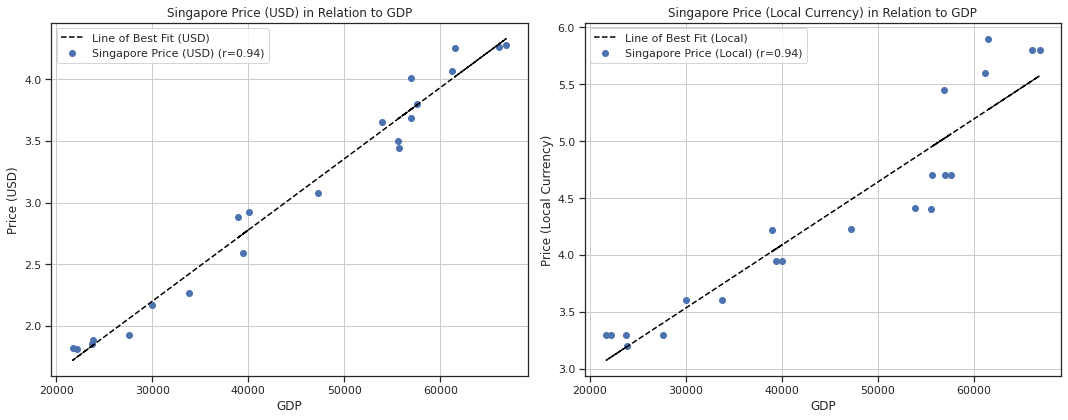

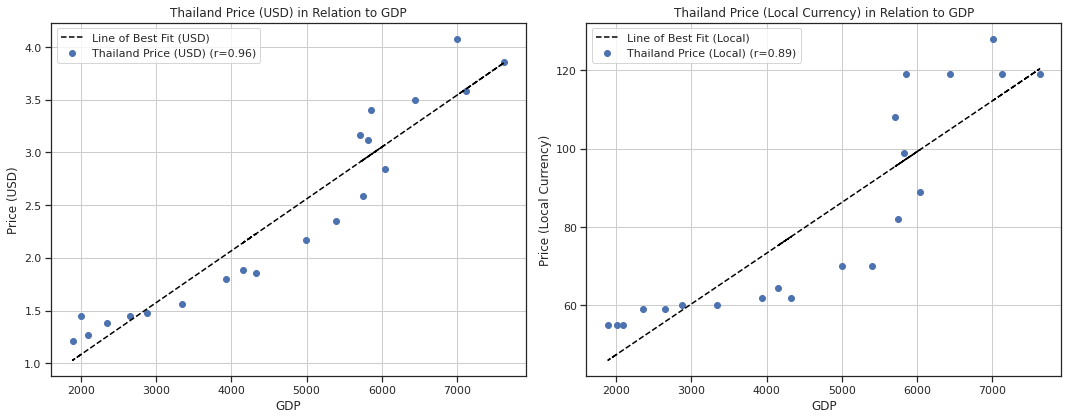

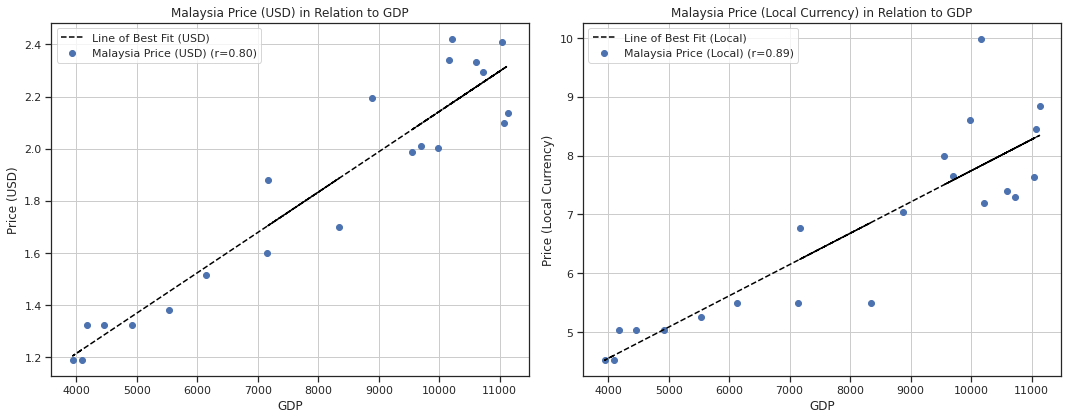

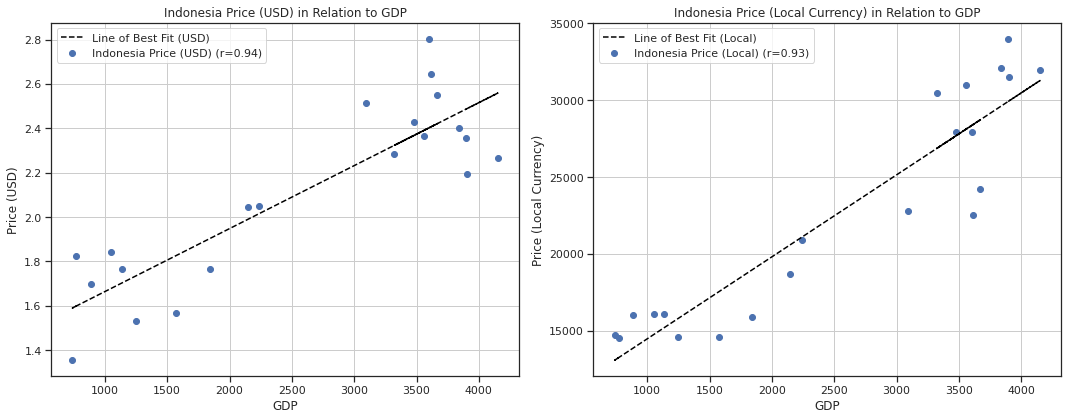

In [26]:
# List of desired countries
countries = ['Singapore', 'Thailand', 'Malaysia', 'Indonesia']

# Loop through each country
for name in countries:
  filtered_df = df_bigmac[df_bigmac['name'] == name]

  # Create a figure with 2 subplots (1 row, 2 columns)
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

  # --- Plot 1: Price (USD) vs. GDP ---
  x = filtered_df['GDP']
  y_usd = filtered_df['dollar_price']
    
  # Calculate correlation coefficient for USD price
  correlation_usd = np.corrcoef(x, y_local)[0, 1]

  # Scatter plot for USD
  ax1.scatter(x, y_usd, marker='o', label=f"{name} Price (USD) (r={correlation_usd:.2f})")

  # Line of best fit for USD
  m_usd, b_usd = np.polyfit(x, y_usd, 1)
  ax1.plot(x, m_usd*x + b_usd, color='black', linestyle='--', label='Line of Best Fit (USD)')

  ax1.set_title(f'{name} Price (USD) in Relation to GDP')
  ax1.set_xlabel('GDP')
  ax1.set_ylabel('Price (USD)')
  ax1.legend()
  ax1.grid(True)

  # --- Plot 2: Local Currency Price vs. GDP ---
  y_local = filtered_df['local_price']

  # Calculate correlation coefficient for local price
  correlation_local = np.corrcoef(x, y_local)[0, 1]

  # Scatter plot for local currency
  ax2.scatter(x, y_local, marker='o', label=f"{name} Price (Local) (r={correlation_local:.2f})")

  # Line of best fit for local currency
  m_local, b_local = np.polyfit(x, y_local, 1)
  ax2.plot(x, m_local*x + b_local, color='black', linestyle='--', label='Line of Best Fit (Local)')

  ax2.set_title(f'{name} Price (Local Currency) in Relation to GDP')
  ax2.set_xlabel('GDP')
  ax2.set_ylabel('Price (Local Currency)')
  ax2.legend()
  ax2.grid(True)

  plt.tight_layout()

  fig.savefig(f"{name}_bigmac_price_vs_gdp.png")

  plt.show()

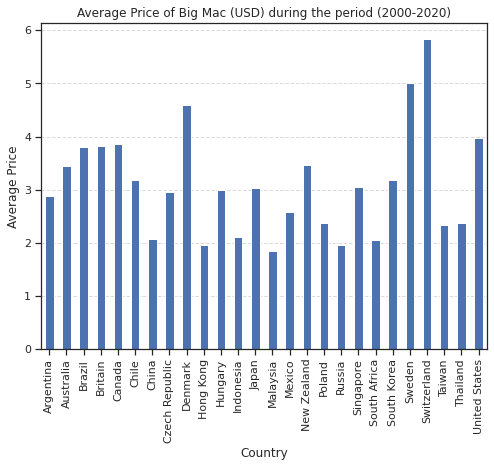

In [46]:
# Group by 'name' and calculate the mean of 'dollar_price' for each group
mean_values = df_bigmac.groupby('name')['dollar_price'].mean()

# Create a bar chart
plt.figure(figsize=(8, 6))  # Set the figure size
mean_values.plot(kind='bar')
plt.title('Average Price of Big Mac (USD) during the period (2000-2020)')
plt.xlabel('Country')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('average_bigmac_price.png')

plt.show()

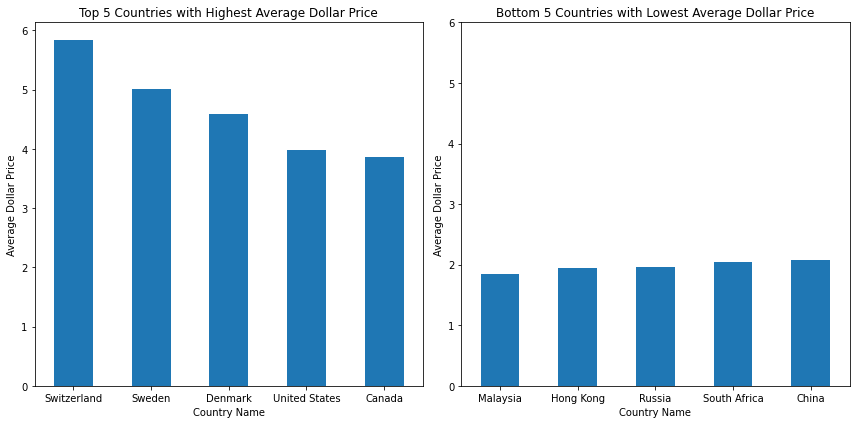

In [98]:
mean_values = df_bigmac.groupby('name')['dollar_price'].mean()


top_5 = mean_values.sort_values(ascending=False).head(5)
bot_5 = mean_values.sort_values(ascending=True).head(5)

# Create subplots
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
y_ticks = range(0, int(top_5.max()) + 2)

# Plot top 5
top_5.plot(kind='bar', ax = ax1)
ax1.set_title('Top 5 Countries with Highest Average Dollar Price')
ax1.set_xlabel('Country Name')
ax1.set_ylabel('Average Dollar Price')
ax1.set_yticks(y_ticks)
ax1.tick_params(axis='x', rotation=0)

# Plot bottom 5
bot_5.plot(kind='bar', ax = ax2)
ax2.set_title('Bottom 5 Countries with Lowest Average Dollar Price')
ax2.set_xlabel('Country Name')
ax2.set_ylabel('Average Dollar Price')
ax2.set_yticks(y_ticks)
ax2.tick_params(axis='x', rotation=0)

plt.tight_layout()

plt.savefig('top_bot_average_bigmac_price.png')

plt.show()

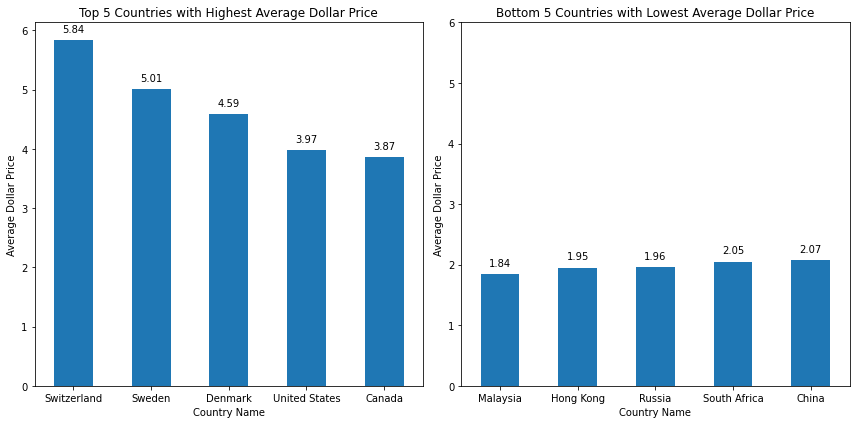

In [73]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
y_ticks = range(0, int(top_5.max()) + 2)

# Plot top 5 with bar labels
top_5.plot(kind='bar', ax=ax1)
for index, value in enumerate(top_5):
  # Calculate bar label position (offset slightly above the bar)
  label_y = value + 0.1
  ax1.text(index, label_y, f"{value:.2f}", ha='center', va='bottom')

ax1.set_title('Top 5 Countries with Highest Average Dollar Price')
ax1.set_xlabel('Country Name')
ax1.set_ylabel('Average Dollar Price')
ax1.set_yticks(y_ticks)
ax1.tick_params(axis='x', rotation=0)

# Plot bottom 5 with bar labels
bot_5.plot(kind='bar', ax=ax2)
for index, value in enumerate(bot_5):
  # Calculate bar label position (offset slightly above the bar)
  label_y = value + 0.1
  ax2.text(index, label_y, f"{value:.2f}", ha='center', va='bottom')

ax2.set_title('Bottom 5 Countries with Lowest Average Dollar Price')
ax2.set_xlabel('Country Name')
ax2.set_ylabel('Average Dollar Price')
ax2.set_yticks(y_ticks)
ax2.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

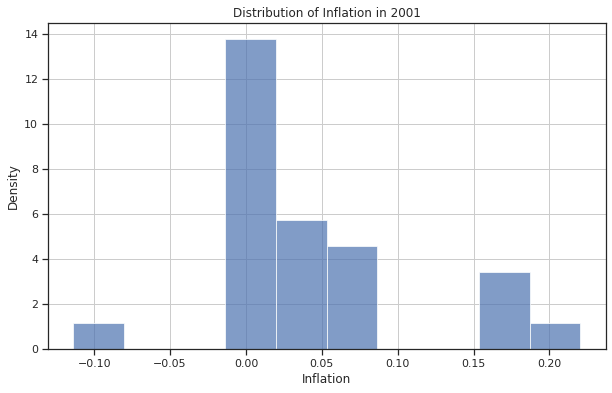

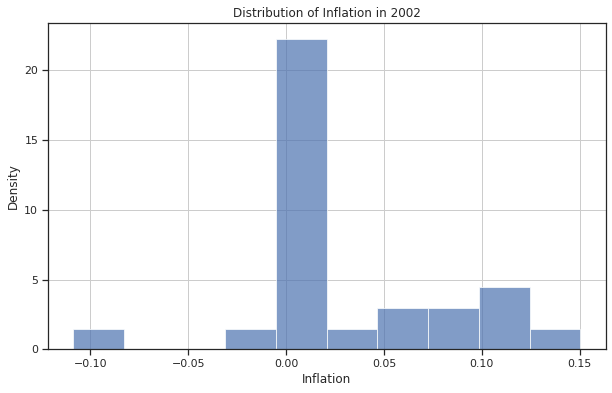

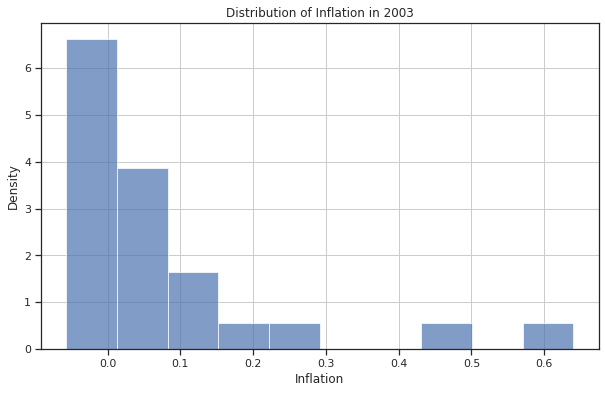

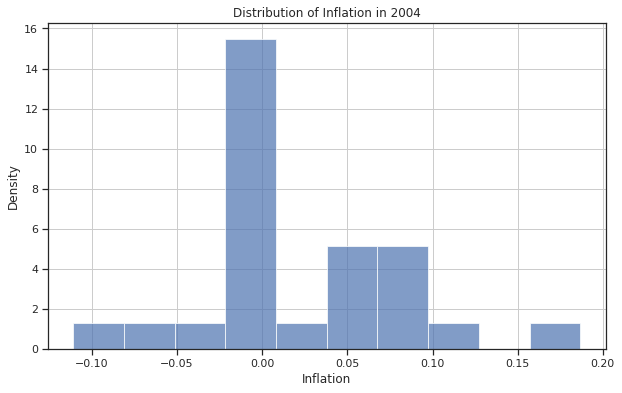

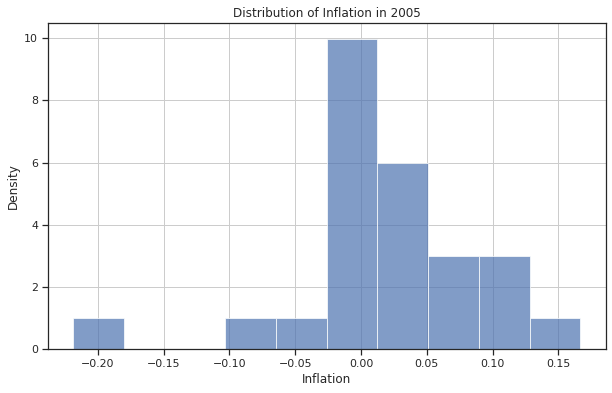

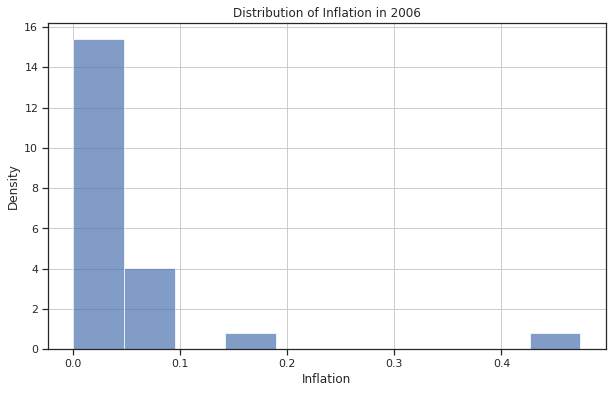

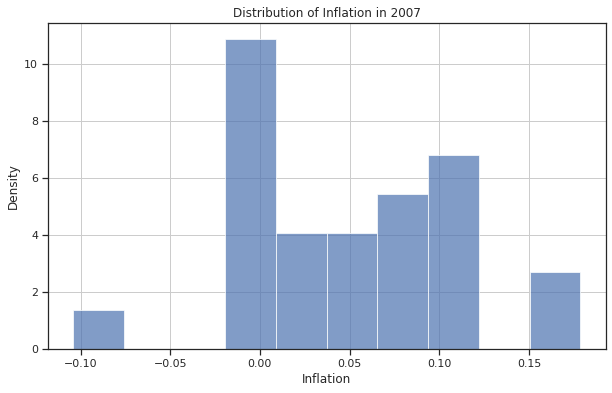

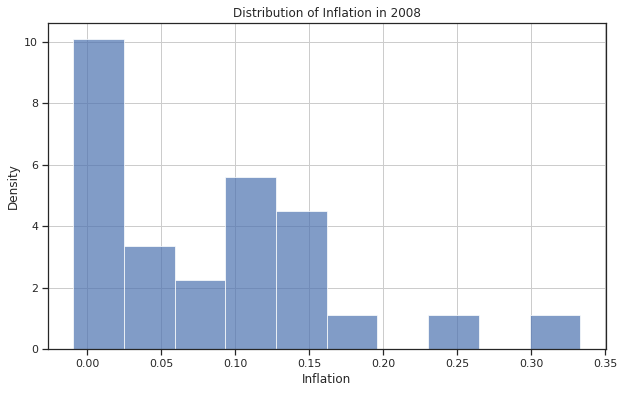

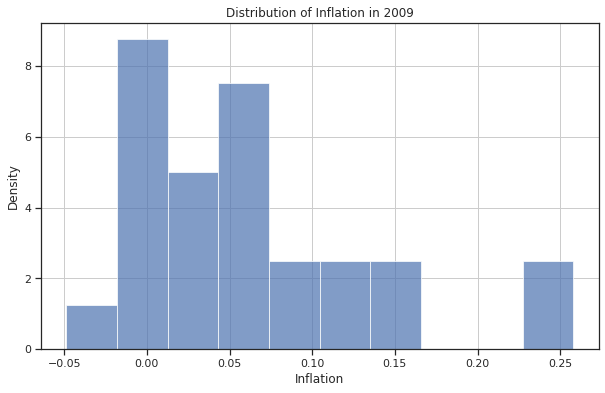

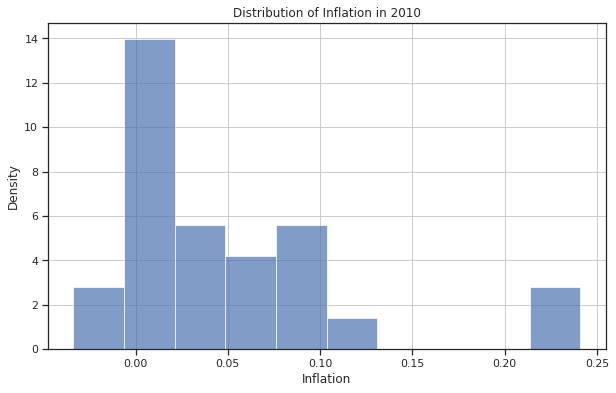

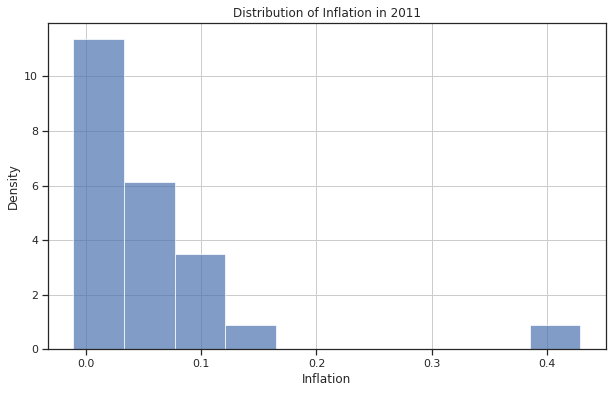

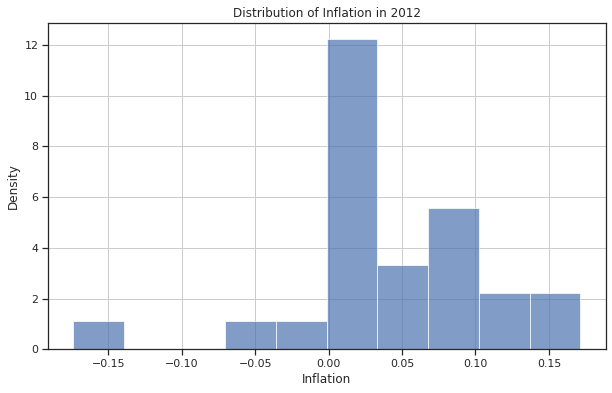

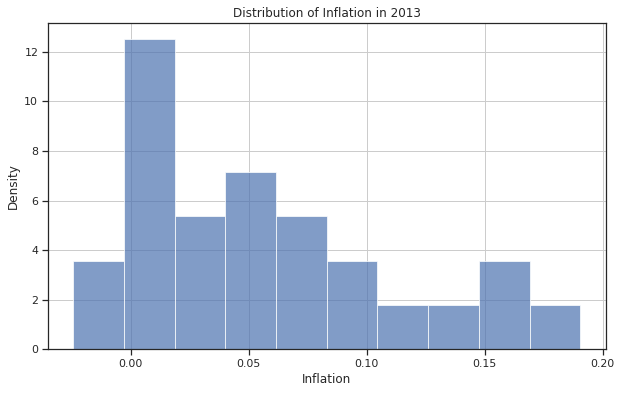

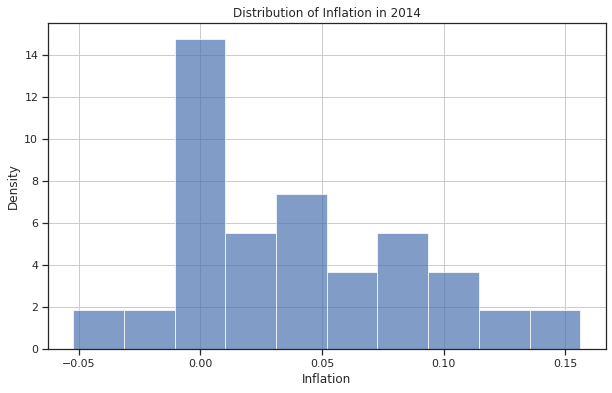

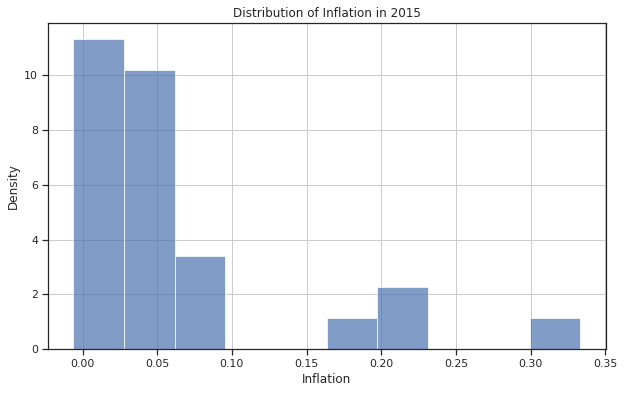

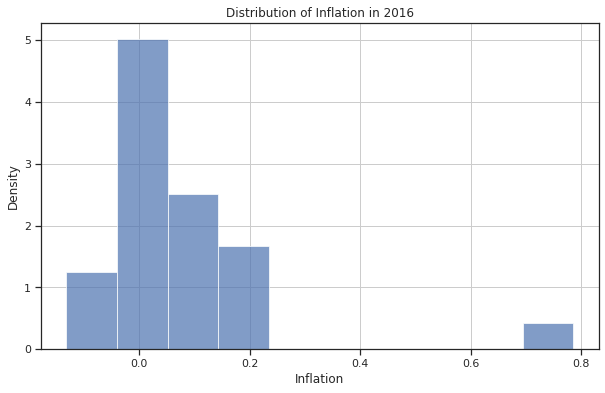

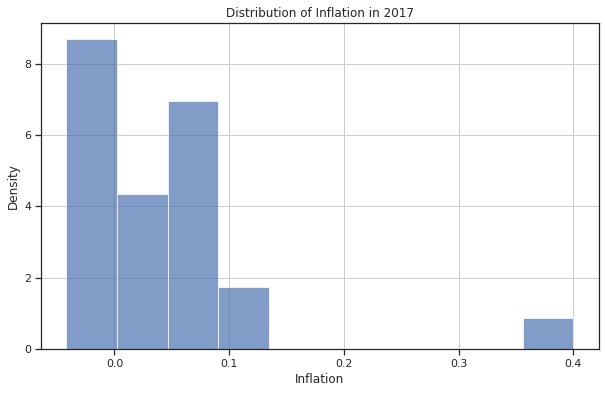

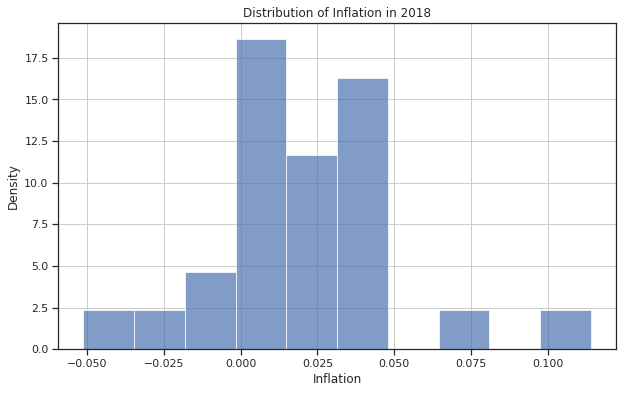

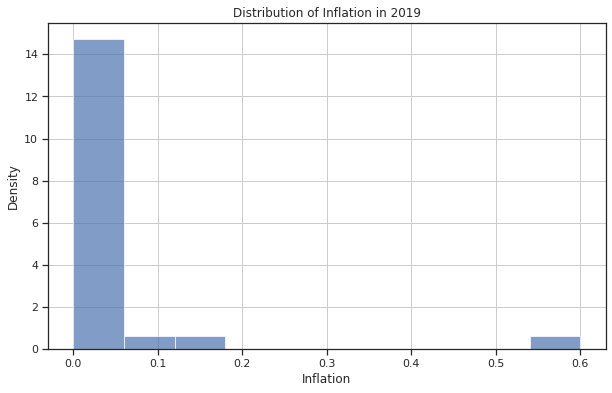

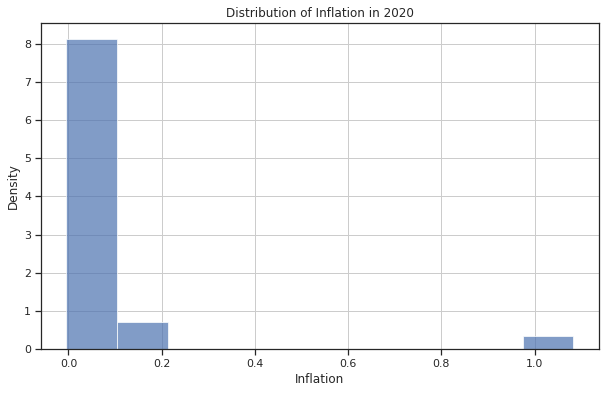

In [45]:
#Histogram chart for every year except 2000 since that is our starting year
for year in unique_years:
    if year != 2000:  # Skip year 2000
        filtered_df = df_bigmac[df_bigmac['Year'] == year]

        # Create a figure for this year's histogram
        plt.figure(figsize=(10, 6))
        plt.hist(filtered_df['Inflation_Local'], bins=10, density=True, alpha=0.7)
        plt.title(f"Distribution of Inflation in {year}")
        plt.xlabel("Inflation")
        plt.ylabel("Density")
        plt.grid(True)

        # Save the figure with a filename based on the year
        plt.savefig(f'inflation_hist_{year}.png')

        plt.show()

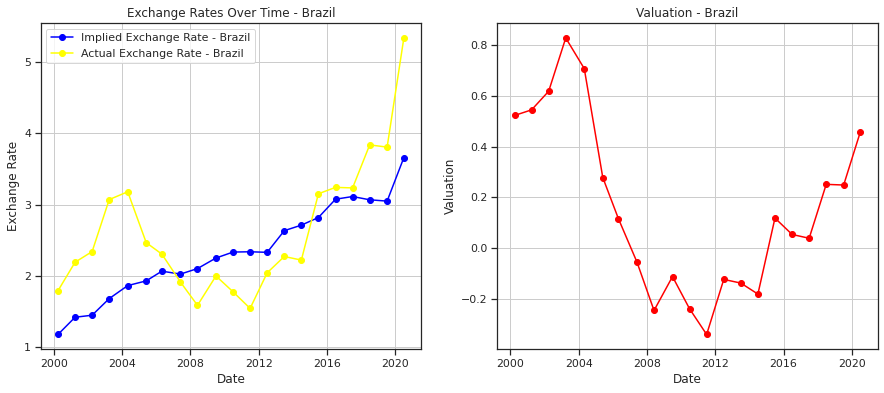

<Figure size 720x432 with 0 Axes>

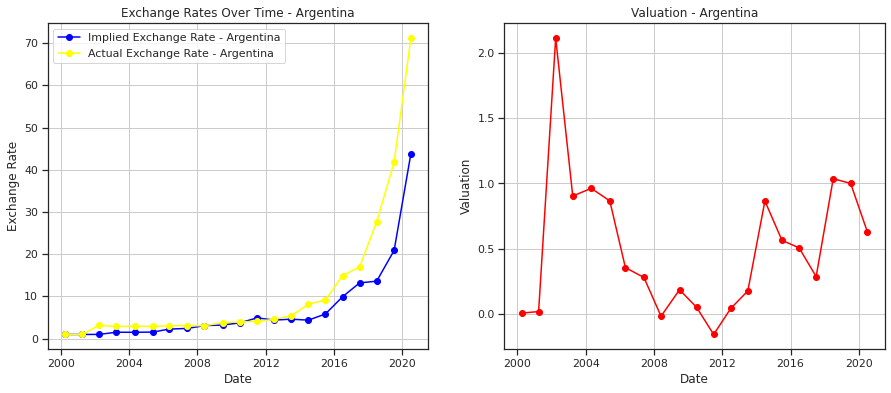

<Figure size 720x432 with 0 Axes>

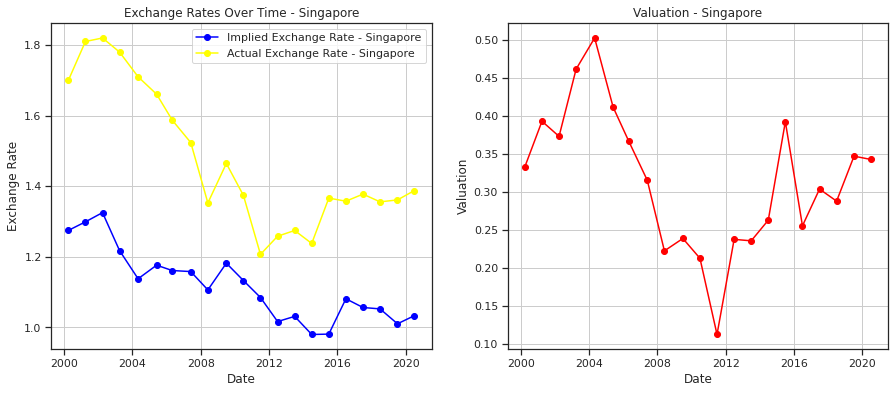

<Figure size 720x432 with 0 Axes>

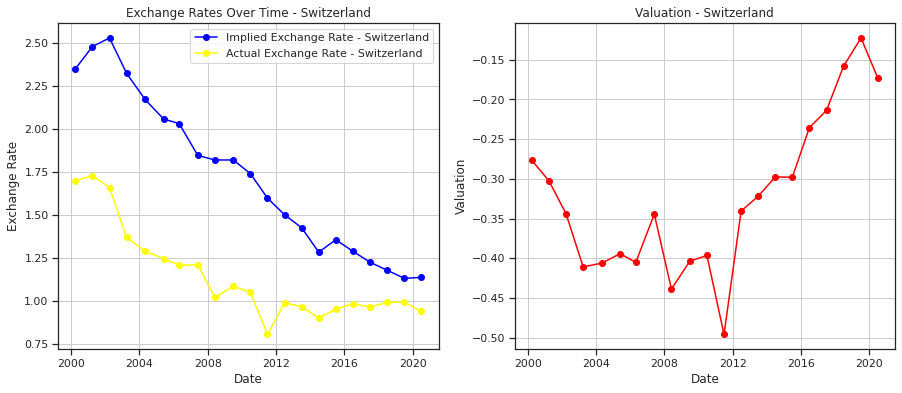

<Figure size 720x432 with 0 Axes>

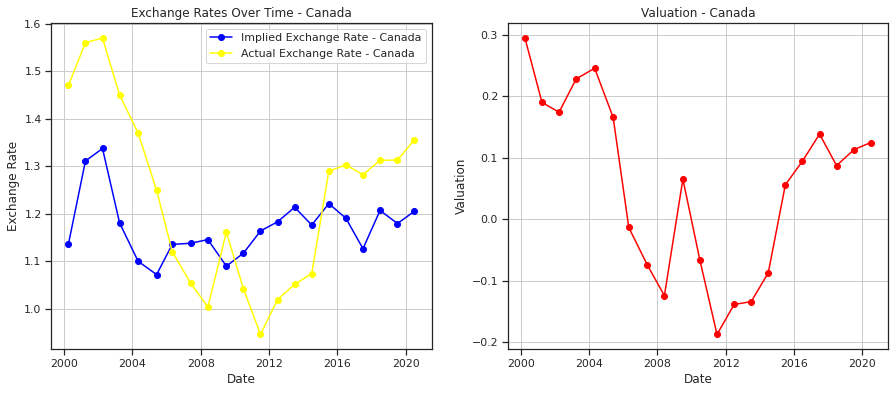

<Figure size 720x432 with 0 Axes>

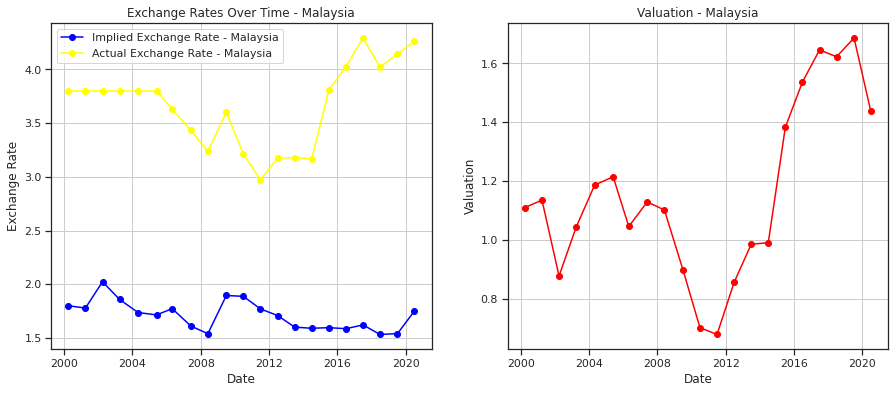

<Figure size 720x432 with 0 Axes>

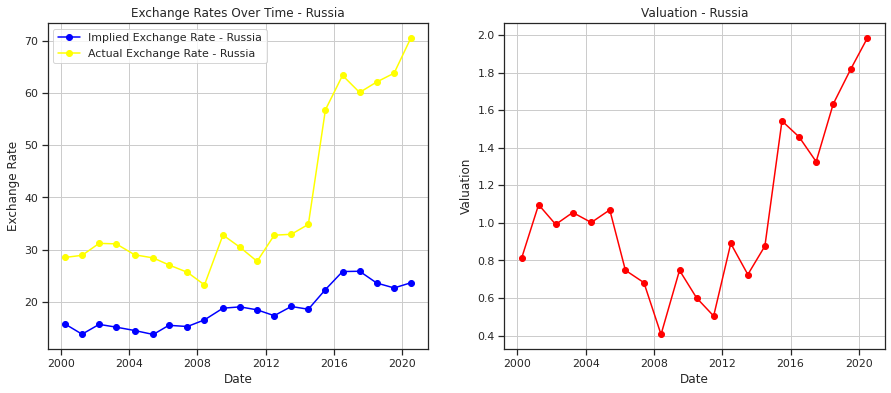

<Figure size 720x432 with 0 Axes>

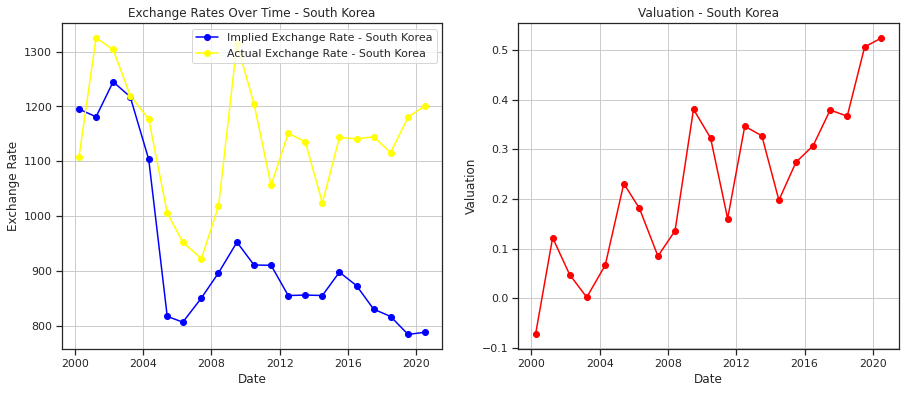

<Figure size 720x432 with 0 Axes>

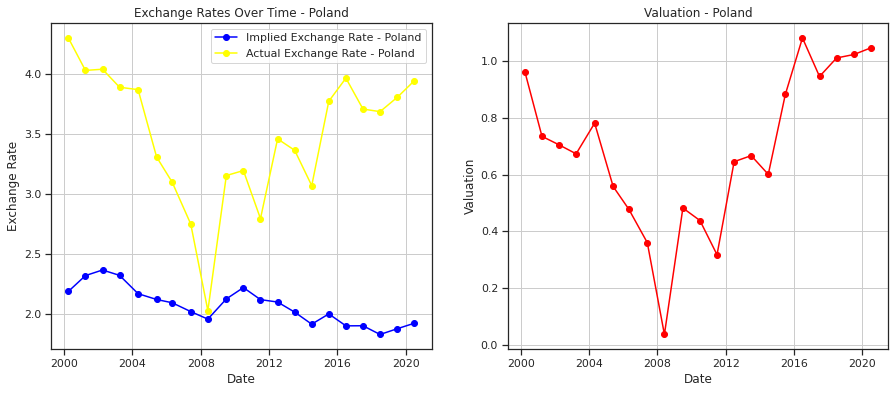

<Figure size 720x432 with 0 Axes>

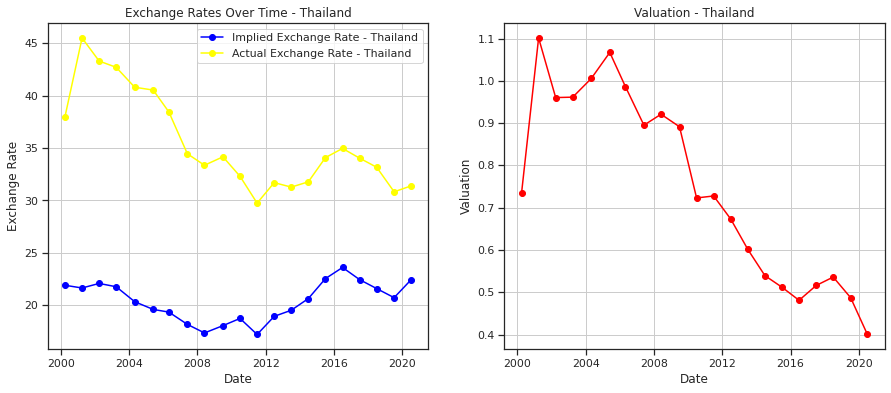

<Figure size 720x432 with 0 Axes>

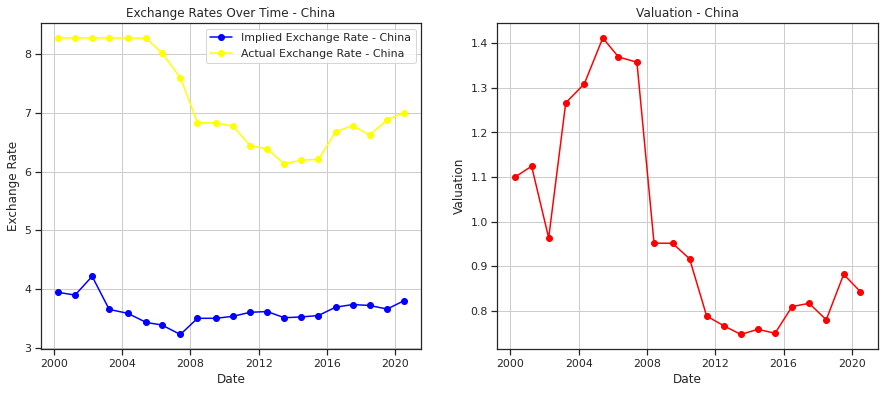

<Figure size 720x432 with 0 Axes>

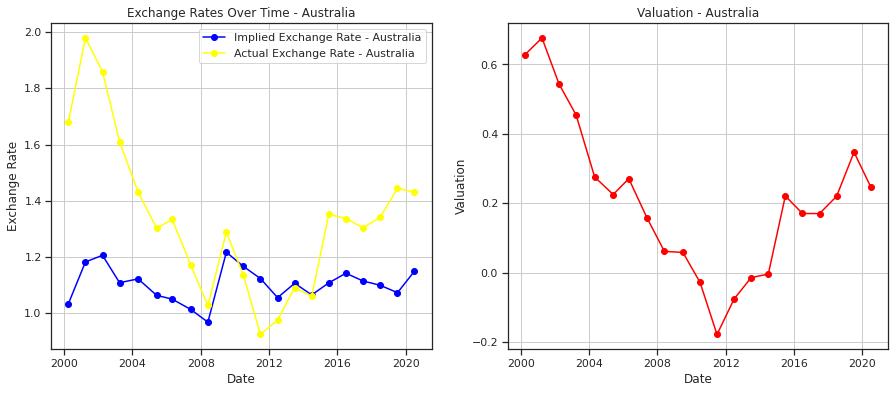

<Figure size 720x432 with 0 Axes>

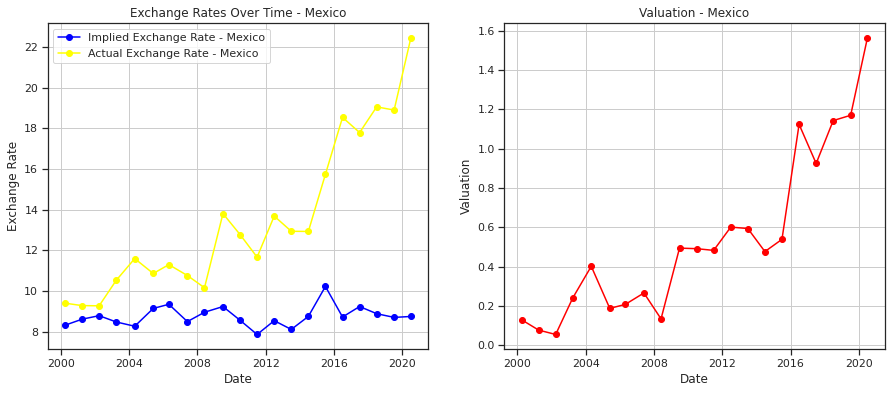

<Figure size 720x432 with 0 Axes>

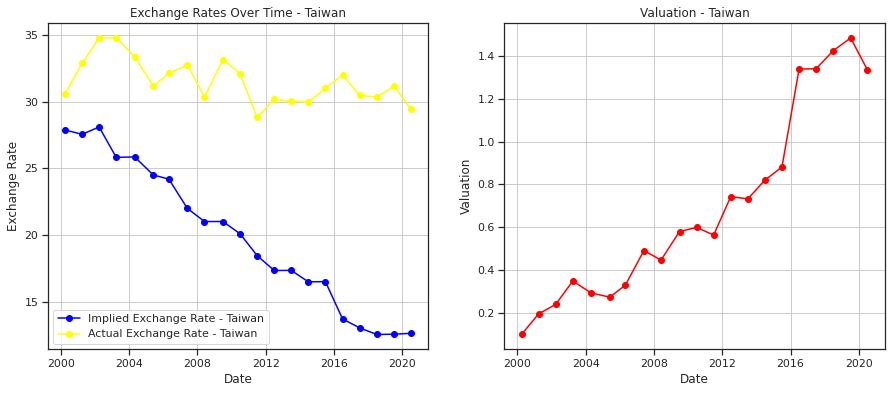

<Figure size 720x432 with 0 Axes>

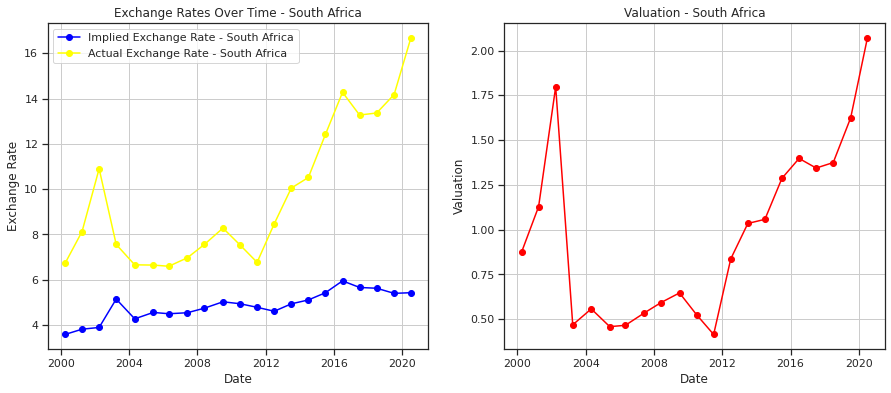

<Figure size 720x432 with 0 Axes>

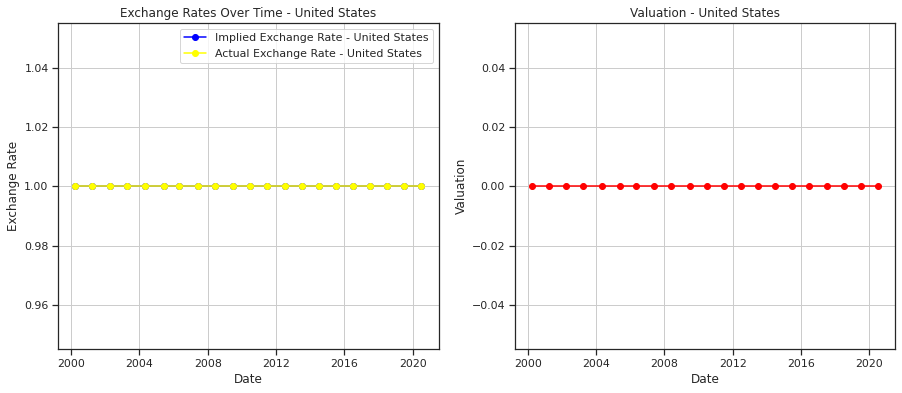

<Figure size 720x432 with 0 Axes>

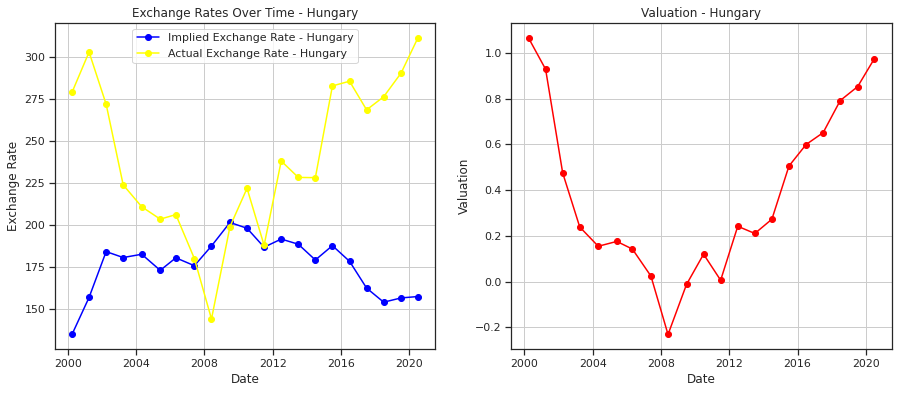

<Figure size 720x432 with 0 Axes>

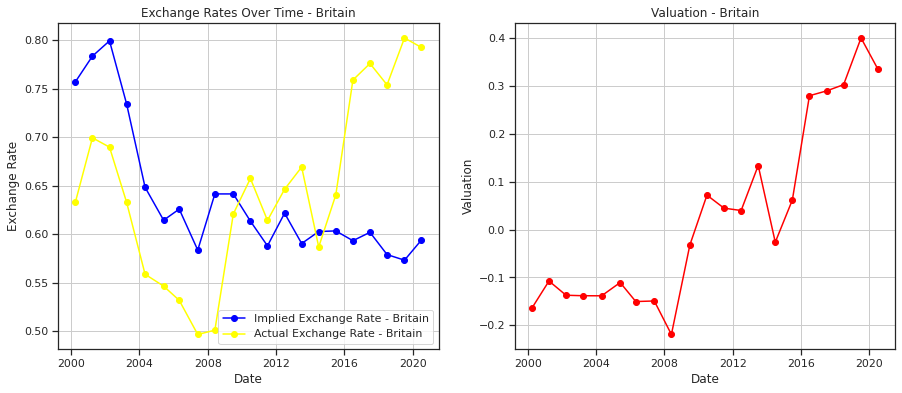

<Figure size 720x432 with 0 Axes>

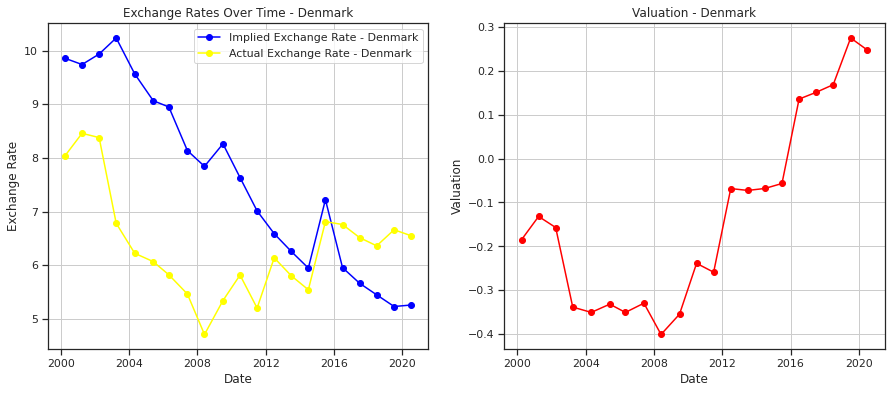

<Figure size 720x432 with 0 Axes>

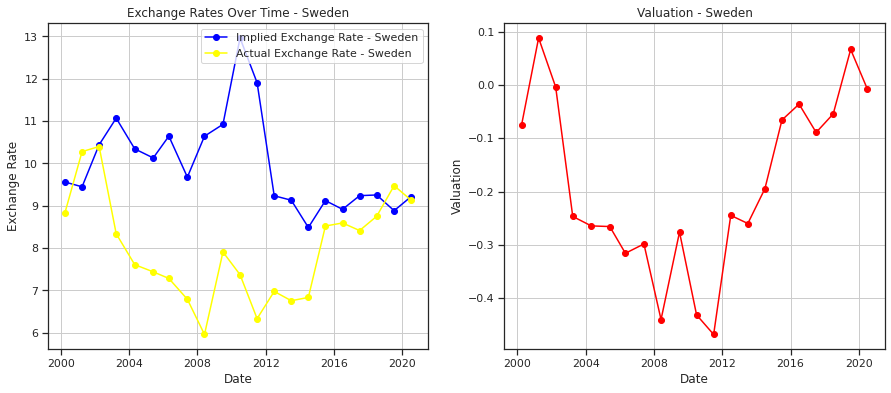

<Figure size 720x432 with 0 Axes>

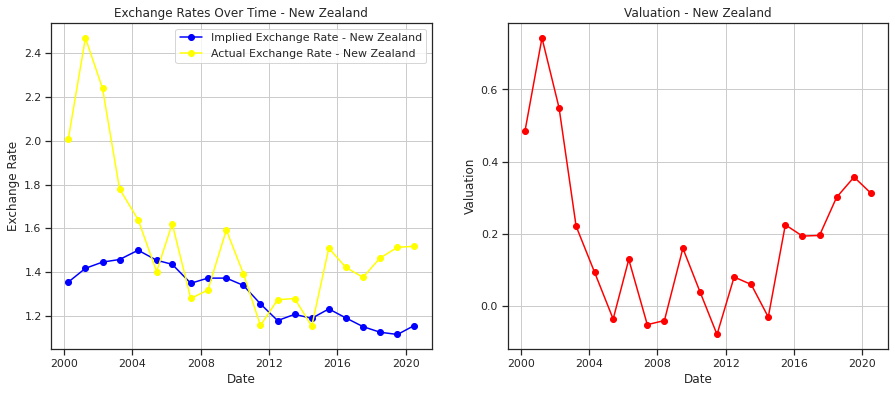

<Figure size 720x432 with 0 Axes>

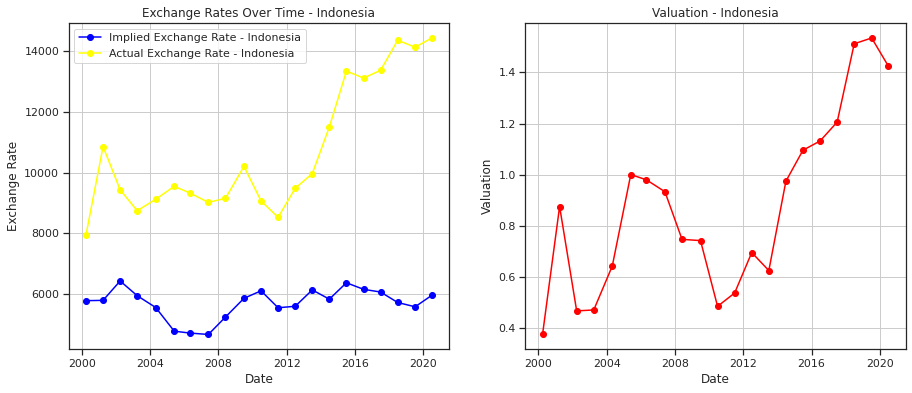

<Figure size 720x432 with 0 Axes>

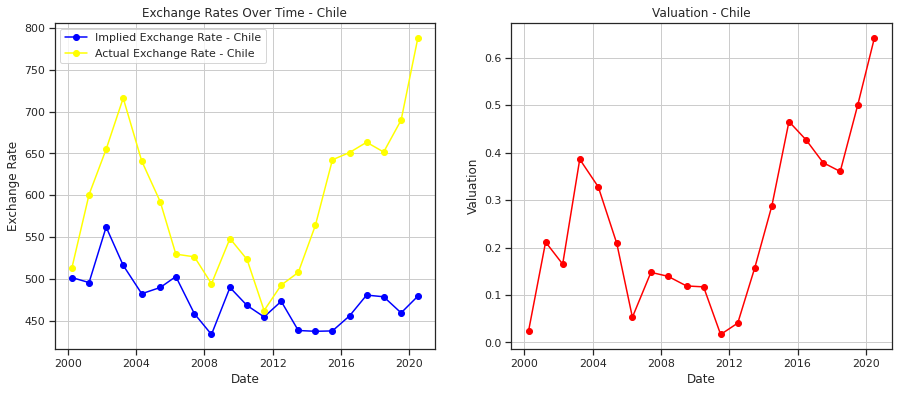

<Figure size 720x432 with 0 Axes>

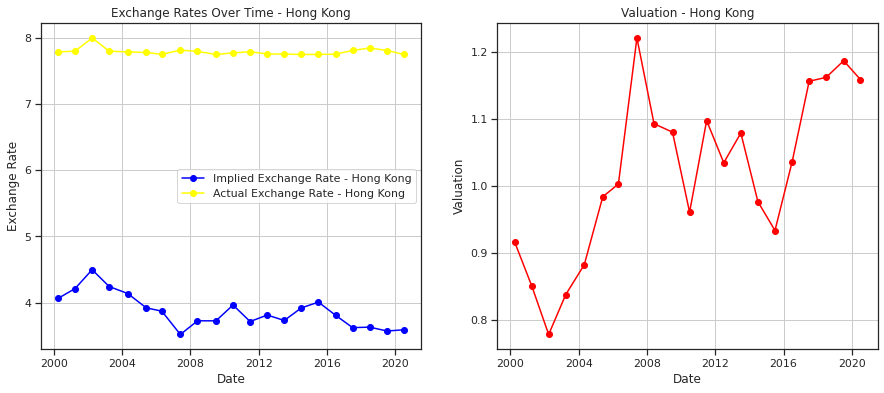

<Figure size 720x432 with 0 Axes>

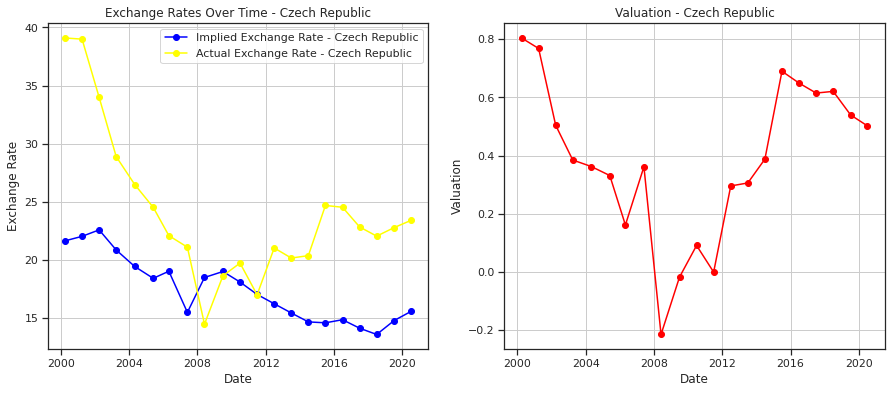

<Figure size 720x432 with 0 Axes>

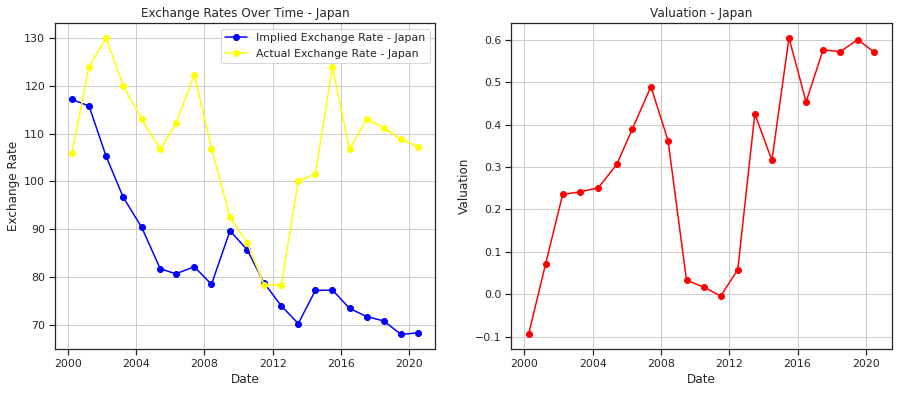

<Figure size 720x432 with 0 Axes>

In [16]:
#Line Graphs to compare currency valuation

for name in unique_names:
# First Graph with both implied and actual exchange rates
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    filtered_df = df_bigmac[df_bigmac['name'] == name]
    ax1.plot(filtered_df['date'], filtered_df['PPP'], marker='o', color='blue', label='Implied Exchange Rate - ' + name)
    ax1.plot(filtered_df['date'], filtered_df['dollar_ex'], marker='o', color='yellow', label='Actual Exchange Rate - ' + name)

    ax1.set_title('Exchange Rates Over Time - ' + name)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Exchange Rate')
    ax1.legend()
    ax1.grid(True)

# Second graph with valuation
    plt.figure(figsize=(10,6))
    filtered_df = df_bigmac[df_bigmac['name'] == name]
    ax2.plot(filtered_df['date'], filtered_df['Valuation'], marker='o', linestyle='-', color='red')

    ax2.set_title('Valuation - ' + name)
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Valuation')
    ax2.grid(True)
    fig.savefig(f"{name}_exchange_valuation.png")
    plt.show()
    

In [28]:
# Initialize an empty list to store prices for each region
data = []

# Set the target year for analysis
year = 2015

# Iterate through each unique region in the DataFrame
for region in regions:
    # Filter the DataFrame to select rows for the current region and year
    x = df_bigmac[(df_bigmac["region"] == region)]
    y = x[x["date"].apply(lambda x: x.year) == year]

    # Extract the 'dollar_price' column as a list
    prices = y["dollar_price"].tolist()

    # Print the region and its corresponding prices
    print(region)
    print(prices)

    # Append the list of prices to the data list
    data.append(prices)

Americas
[4.28251939029613, 3.06513409961686, 4.53593859036985, 3.1131371209835, 4.79, 3.26873686668223]
Asia
[3.4396955503512903, 2.00972021542099, 3.76038478355925, 3.1683168316831702, 2.73787283385943, 2.5467440361057405, 2.28558582187418, 2.47716364762347, 2.98543591398717]
Europe
[6.82199832073888, 1.88330546510605, 2.5439898240407004, 3.1815858296409303, 5.07851212368137, 5.1275131561192815, 2.83374996204799]
Oceania
[3.9222649999901895, 3.90963499998182]
Africa
[2.0943167492982]


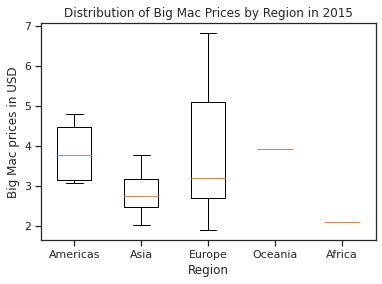

In [29]:
#Create boxplot for each region
fig = plt.figure()
plt.boxplot(data)
plt.xlabel("Region")
plt.ylabel("Big Mac prices in USD")
plt.title("Distribution of Big Mac Prices by Region in " + str(year))
plt.xticks([1,2,3,4,5], regions)
fig.savefig("boxplot.png")

In [99]:
# Initialize a list to store average prices for each region in 2000
data2 = []

# Set the target year for comparison
year = 2015

# Iterate over each region
for region in regions:
    # Filter the DataFrame for the current region
    x = df_bigmac[df_bigmac["region"] == region]

    # Extract country names for the year 2000 in the current region
    yz = x[x["date"].apply(lambda x: x.year) == 2000]["name"].tolist()

    # Initialize a list to store average prices for countries in the current region
    prices = []

    # Iterate over each country in the region for the year 2000
    for country in yz:
        # Filter the DataFrame for the current country and region
        temp = x[x["name"] == country]["dollar_price"].tolist()

        # Calculate the average price for the country
        avg = sum(temp) / len(temp)

        # Append the average price to the list of prices for the region
        prices.append(avg)

    # Append the list of average prices for the current region to the main data list
    data2.append(prices)

In [100]:
# Find USA's average price over the period
usprice = df_bigmac[df_bigmac['name'] == "United States"]["dollar_price"].tolist()
average_us = sum(usprice) / len(usprice)
print(average_us)

3.972738095238095


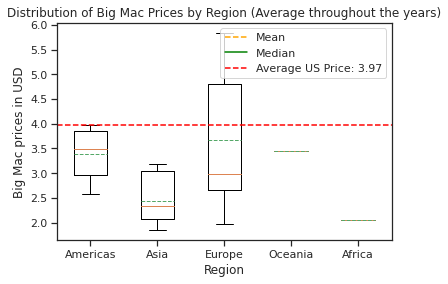

In [107]:
# Create new boxplot for big mac prices over the period by region
fig2 = plt.figure()
plt.boxplot(data2, showmeans=True, meanline=True)
plt.axhline(y=average_us, color='red', linestyle='--', label=f'Average US Price: {average_us:.2f}')

plt.xlabel("Region")
plt.ylabel("Big Mac prices in USD")
plt.title("Distribution of Big Mac Prices by Region (Average throughout the years)")
plt.xticks([1,2,3,4,5], regions)
# Create custom legend
mean_line = Line2D([0], [0], color='orange', linestyle='--', label='Mean')
median_line = Line2D([0], [0], color='green', linestyle='-', label='Median')
plt.legend(handles=[mean_line, median_line, plt.Line2D([0], [0], color='red', linestyle='--', label=f'Average US Price: {average_us:.2f}')])
fig2.savefig("boxplot(average).png")

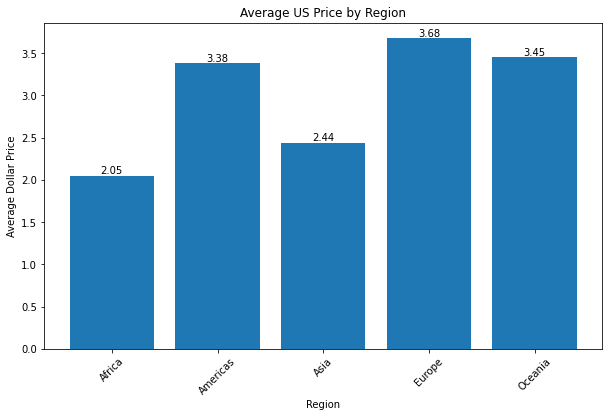

In [9]:
#Bar Graph to show the average price of a big mac by region over the period
grouped_data = df_bigmac.groupby('region')['dollar_price'].mean()
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Region')
plt.ylabel('Average Dollar Price')
plt.title('Average US Price by Region')
plt.xticks(rotation=45)
for i, v in enumerate(grouped_data.values):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
plt.savefig("barplot.png")
plt.show()

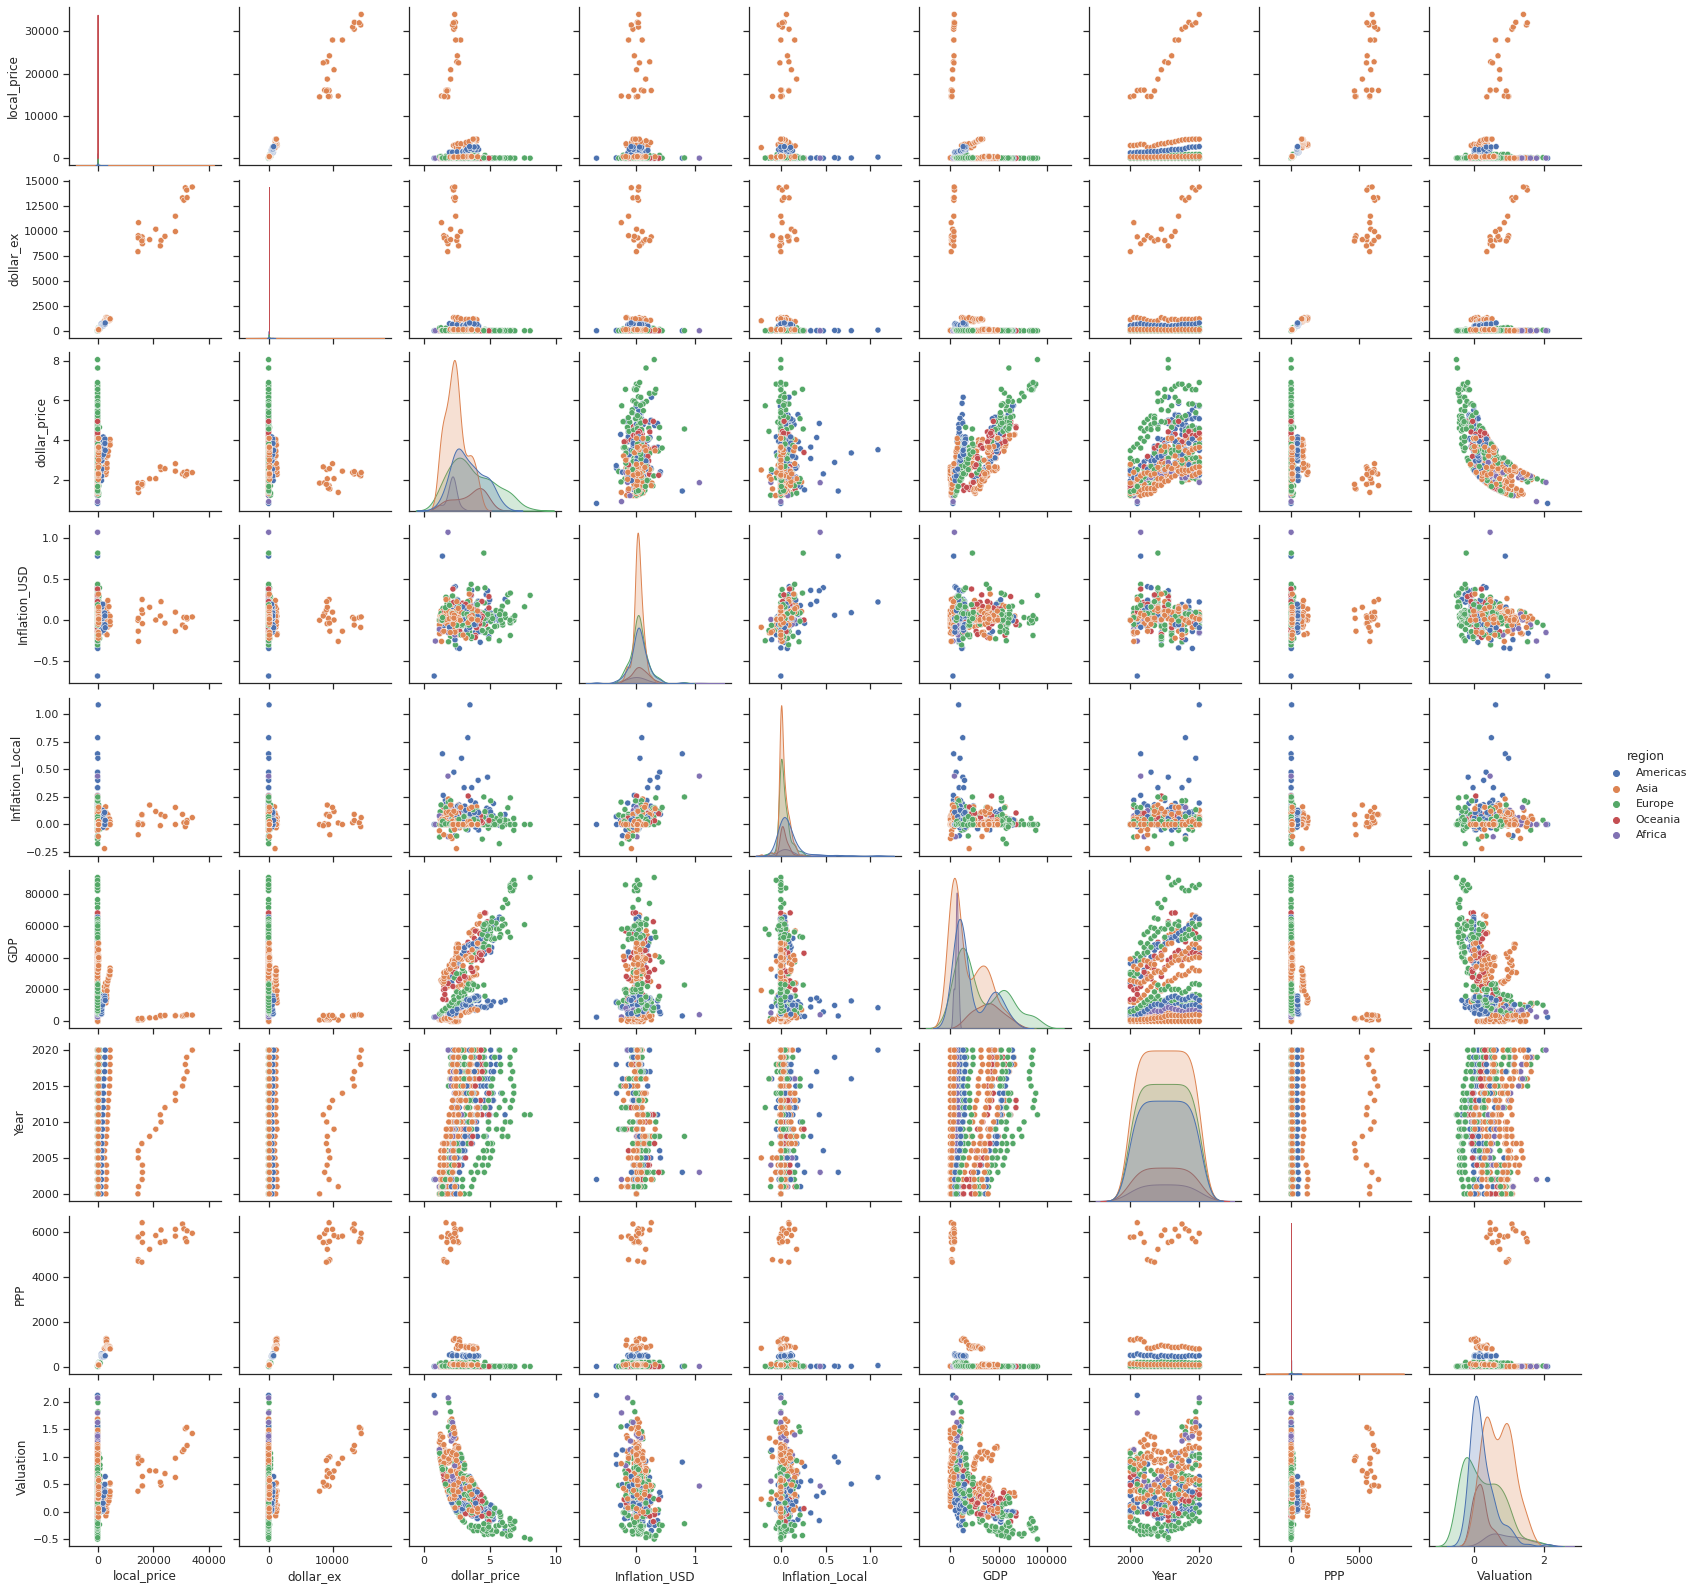

In [31]:
#Scatter matrix by region
sns.set_theme(style="ticks")
scatterplt = sns.pairplot(df_bigmac, hue="region")
scatterplt.savefig("scatterplot_region.png")

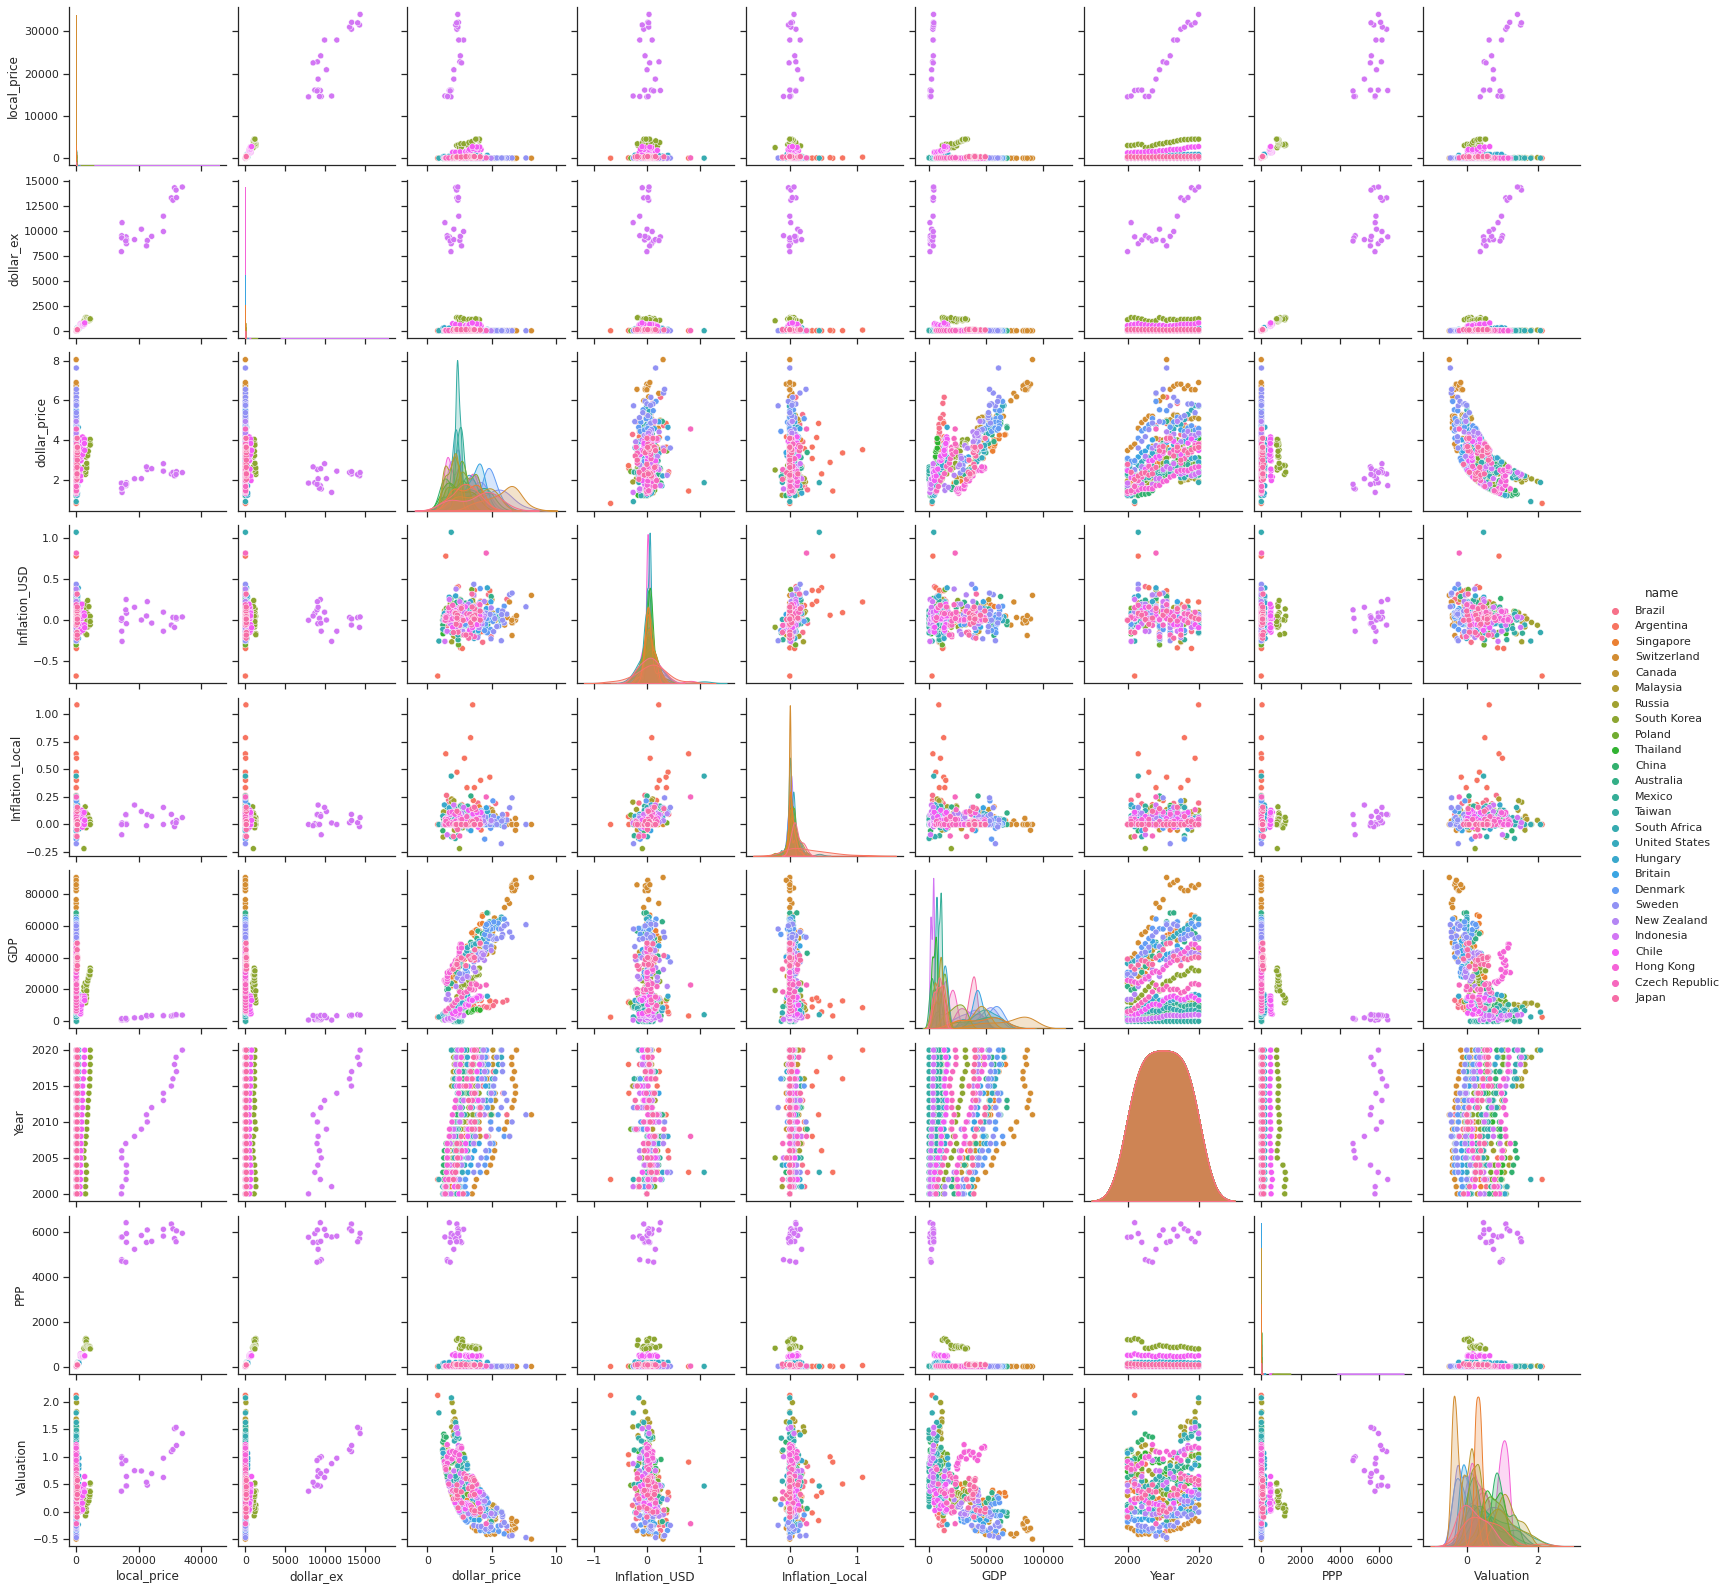

In [30]:
#Scatter matrix by Country
sns.set_theme(style="ticks")
scatterplt = sns.pairplot(df_bigmac, hue="name")
scatterplt.savefig("scatterplot_country.png")

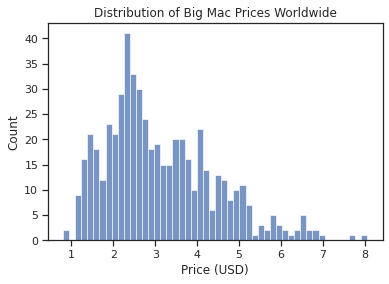

In [11]:
#Histogram for every price of a big mac throughout the period
hisplot = sns.histplot(df_bigmac, x="dollar_price", bins=50)
hisplot.set(title="Distribution of Big Mac Prices Worldwide", xlabel="Price (USD)")
hisplot_fig = hisplot.get_figure()
hisplot_fig.savefig("histplot.png")